In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

import time

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from scipy.sparse import csr_matrix

In [2]:
# !pip install wordcloud

In [3]:
# Importing anime dataset
anime = pd.read_csv('../assets/anime.csv')
anime

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,Unknown,Unknown,Unknown,Novel,Unknown,Unknown,Unknown,13116,354,6,0,0,0,0,354,Unknown,Unknown,Unknown,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,Unknown,Kadokawa,Unknown,Passione,Manga,Unknown,Unknown,Unknown,17562,7010,70,14,0,14,0,6982,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,Unknown,"Jul, 2021 to ?",Summer 2021,Unknown,Unknown,Unknown,Visual novel,Unknown,R - 17+ (violence & profanity),Unknown,17558,11309,48,3,0,0,0,11306,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17560,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,TV,Unknown,Unknown,Unknown,Kadokawa,Unknown,8bit,Manga,Unknown,PG-13 - Teens 13 or older,Unknown,17565,1386,2,13,2,2,1,1368,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [4]:
# Importing rating 
rating = pd.read_csv('../assets/rating_complete.csv')
rating

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9
...,...,...,...
57633273,353404,502,8
57633274,353404,987,4
57633275,353404,225,8
57633276,353404,243,7


In [5]:
# Import synopsis dataset
synopsis = pd.read_csv('../assets/anime_with_synopsis.csv')
synopsis

,MAL_ID,Name,Score,Genres,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...
...,...,...,...,...,...
16209,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",No synopsis information has been added to this...
16210,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",ko is a typical high school student whose life...
16211,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Sequel to Higurashi no Naku Koro ni Gou .
16212,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",New Yama no Susume anime.


In [6]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

In [7]:
anime['Studios'].nunique()

1090

In [8]:
anime.describe()

,MAL_ID,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
count,17562.000000,17562.000000,1.756200e+04,17562.000000,17562.000000,1.756200e+04,17562.000000,17562.000000,17562.000000
mean,21477.192347,8763.452340,3.465854e+04,457.746270,2231.487758,2.209557e+04,955.049653,1176.599533,8199.831227
std,14900.093170,5059.327278,1.252821e+05,4063.473313,14046.688133,9.100919e+04,4275.675096,4740.348653,23777.691963
min,1.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,5953.500000,4383.500000,3.360000e+02,0.000000,13.000000,1.110000e+02,6.000000,37.000000,112.000000
50%,22820.000000,8762.500000,2.065000e+03,3.000000,73.000000,8.175000e+02,45.000000,77.000000,752.500000
75%,35624.750000,13145.000000,1.322325e+04,31.000000,522.000000,6.478000e+03,291.750000,271.000000,4135.500000
max,48492.000000,17565.000000,2.589552e+06,183914.000000,887333.000000,2.182587e+06,187919.000000,174710.000000,425531.000000


In [9]:
# Merging anime with synopsis
anime = anime.merge(synopsis, on = ["Name"])
anime.head()

,MAL_ID_x,Name,Score_x,Genres_x,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,MAL_ID_y,Score_y,Genres_y,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,5,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,6,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,7,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,8,6.98,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...


In [10]:
anime.shape

(16224, 39)

In [11]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16224 entries, 0 to 16223
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID_x       16224 non-null  int64 
 1   Name           16224 non-null  object
 2   Score_x        16224 non-null  object
 3   Genres_x       16224 non-null  object
 4   English name   16224 non-null  object
 5   Japanese name  16224 non-null  object
 6   Type           16224 non-null  object
 7   Episodes       16224 non-null  object
 8   Aired          16224 non-null  object
 9   Premiered      16224 non-null  object
 10  Producers      16224 non-null  object
 11  Licensors      16224 non-null  object
 12  Studios        16224 non-null  object
 13  Source         16224 non-null  object
 14  Duration       16224 non-null  object
 15  Rating         16224 non-null  object
 16  Ranked         16224 non-null  object
 17  Popularity     16224 non-null  int64 
 18  Members        16224 non-n

In [12]:
# Checking if MAL_ID in anime dataset is similarly mapped in synopsis dataset

for i in anime.index:
    anime['id_diff'] = 'Yes' if anime.loc[i,'MAL_ID_x'] != anime.loc[i,'MAL_ID_y'] else 'No'
    
anime

,MAL_ID_x,Name,Score_x,Genres_x,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,MAL_ID_y,Score_y,Genres_y,sypnopsis,id_diff
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever...",No
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,5,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ...",No
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,6,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0...",No
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,7,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...,No
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,8,6.98,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16219,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,Unknown,Unknown,Unknown,Novel,Unknown,Unknown,Unknown,13116,354,6,0,0,0,0,354,Unknown,Unknown,Unknown,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,48481,Unknown,"Adventure, Mystery, Supernatural",No synopsis information has been added to this...,No
16220,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,Unknown,Kadokawa,Unknown,Passione,Manga,Unknown,Unknown,Unknown,17562,7010,70,14,0,14,0,6982,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,48483,Unknown,"Comedy, Horror, Supernatural",ko is a typical high school student whose life...,No
16221,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,Unknown,"Jul, 2021 to ?",Summer 2021,Unknown,Unknown,Unknown,Visual novel,Unknown,R - 17+ (violence & profa

In [13]:
anime['id_diff'].value_counts()

# MAL_ID for each anime is similarly mapped in anime dataset and synopsis dataset 

No    16224
Name: id_diff, dtype: int64

In [14]:
# Dropping merged columns from synopsis, except for synopsis column 
to_drop = ['MAL_ID_y', 'Score_y', 'Genres_y','id_diff']
anime.drop(columns = to_drop, inplace = True)

# Rename columns with _x back to original form
anime.rename(columns = {'Score_x': 'Score', 'MAL_ID_x': 'MAL_ID', 'Genres_x': 'Genres','sypnopsis':'synopsis'}, inplace = True)

anime

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,synopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,"In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,"other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,"Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,It is the dark century and the people are suff...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16219,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,Unknown,Unknown,Unknown,Novel,Unknown,Unknown,Unknown,13116,354,6,0,0,0,0,354,Unknown,Unknown,Unknown,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,No synopsis information has been added to this...
16220,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,Unknown,Kadokawa,Unknown,Passione,Manga,Unknown,Unknown,Unknown,17562,7010,70,14,0,14,0,6982,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,ko is a typical high school student whose life...
16221,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,Unknown,"Jul, 2021 to ?",Summer 2021,Unknown,Unknown,Unknown,Visual novel,Unknown,R - 17+ (violence & profanity),Unknown,17558,11309,48,3,0,0,0,11306,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Sequel to Higurashi no Naku Koro ni Gou .
16222,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,TV,Unknown,Unknown,Unknown,Kadokawa,Unknown,8bit,Manga,Unknown,PG-13 - Teens 13 or older,Unknown,17565,1386,2,13,2,2,1,1368,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Un

In [15]:
# Removing irrelevant columns 
anime = anime[['MAL_ID','Name','Score','Genres','English name','Type','Episodes','Ranked','Popularity','Members','Favorites','synopsis']]
anime

,MAL_ID,Name,Score,Genres,English name,Type,Episodes,Ranked,Popularity,Members,Favorites,synopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,TV,26,28.0,39,1251960,61971,"In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,Movie,1,159.0,518,273145,1174,"other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,TV,26,266.0,201,558913,12944,"Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,TV,26,2481.0,1467,94683,587,ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,TV,52,3710.0,4369,13224,18,It is the dark century and the people are suff...
...,...,...,...,...,...,...,...,...,...,...,...,...
16219,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,ONA,Unknown,Unknown,13116,354,6,No synopsis information has been added to this...
16220,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,TV,Unknown,Unknown,17562,7010,70,ko is a typical high school student whose life...
16221,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,TV,Unknown,Unknown,17558,11309,48,Sequel to Higurashi no Naku Koro ni Gou .
16222,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Unknown,TV,Unknown,Unknown,17565,1386,2,New Yama no Susume anime.


In [16]:
# Duplicated anime names
print(anime['Name'].duplicated().sum())

# Drop duplicate animes with same name and keep first occurence
anime = anime.drop_duplicates(subset = 'Name', keep = 'first')

anime

14


,MAL_ID,Name,Score,Genres,English name,Type,Episodes,Ranked,Popularity,Members,Favorites,synopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,TV,26,28.0,39,1251960,61971,"In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,Movie,1,159.0,518,273145,1174,"other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,TV,26,266.0,201,558913,12944,"Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,TV,26,2481.0,1467,94683,587,ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,TV,52,3710.0,4369,13224,18,It is the dark century and the people are suff...
...,...,...,...,...,...,...,...,...,...,...,...,...
16219,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,ONA,Unknown,Unknown,13116,354,6,No synopsis information has been added to this...
16220,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,TV,Unknown,Unknown,17562,7010,70,ko is a typical high school student whose life...
16221,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,TV,Unknown,Unknown,17558,11309,48,Sequel to Higurashi no Naku Koro ni Gou .
16222,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Unknown,TV,Unknown,Unknown,17565,1386,2,New Yama no Susume anime.


In [17]:
# Dropping rows with 'Unknown' scores
anime = anime[anime['Score'] != 'Unknown']
anime = anime.reset_index(drop = True)
print(anime.shape)

(11090, 12)


In [18]:
rating['rating'].value_counts().sum()

57633278

In [19]:
# %%time
# drop = [num for num in rating['anime_id'] if num not in anime['MAL_ID']]
# len(drop)
# Anime_id that are present in rating dataset but not in anime dataset

In [20]:
rating['anime_id'].nunique()

16872

In [21]:
rating.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

## Data Cleaning and EDA

### Genres

In [22]:
# 'Genres' in string format, to change it to list format
anime['Genres'] = anime['Genres'].map(lambda x: x.split(','))
anime['Genres']

0        [Action,  Adventure,  Comedy,  Drama,  Sci-Fi,...
1              [Action,  Drama,  Mystery,  Sci-Fi,  Space]
2        [Action,  Sci-Fi,  Adventure,  Comedy,  Drama,...
3        [Action,  Mystery,  Police,  Supernatural,  Dr...
4           [Adventure,  Fantasy,  Shounen,  Supernatural]
                               ...                        
11085                                             [Comedy]
11086                                    [Music,  Romance]
11087                             [Slice of Life,  Comedy]
11088    [Mystery,  Psychological,  Supernatural,  Thri...
11089                                    [Comedy,  Sports]
Name: Genres, Length: 11090, dtype: object

In [23]:
# Exploring the number of animes by each genre by exploding dataset via 'Genre'
exploded = anime.explode('Genres', ignore_index = True)

exploded

,MAL_ID,Name,Score,Genres,English name,Type,Episodes,Ranked,Popularity,Members,Favorites,synopsis
0,1,Cowboy Bebop,8.78,Action,Cowboy Bebop,TV,26,28.0,39,1251960,61971,"In the year 2071, humanity has colonized sever..."
1,1,Cowboy Bebop,8.78,Adventure,Cowboy Bebop,TV,26,28.0,39,1251960,61971,"In the year 2071, humanity has colonized sever..."
2,1,Cowboy Bebop,8.78,Comedy,Cowboy Bebop,TV,26,28.0,39,1251960,61971,"In the year 2071, humanity has colonized sever..."
3,1,Cowboy Bebop,8.78,Drama,Cowboy Bebop,TV,26,28.0,39,1251960,61971,"In the year 2071, humanity has colonized sever..."
4,1,Cowboy Bebop,8.78,Sci-Fi,Cowboy Bebop,TV,26,28.0,39,1251960,61971,"In the year 2071, humanity has colonized sever..."
...,...,...,...,...,...,...,...,...,...,...,...,...
36922,47616,Yakusoku no Neverland 2nd Season: Michishirube,4.81,Supernatural,The Promised Neverland Season 2 Episode 5.5,Special,1,10760.0,4398,13070,90,cap of the first season of Yakusoku no Neverla...
36923,47616,Yakusoku no Neverland 2nd Season: Michishirube,4.81,Thriller,The Promised Neverland Season 2 Episode 5.5,Special,1,10760.0,4398,13070,90,cap of the first season of Yakusoku no Neverla...
36924,47616,Yakusoku no Neverland 2nd Season: Michishirube,4.81,Shounen,The Promised Neverland Season 2 Episode 5.5,Special,1,10760.0,4398,13070,90,cap of the first season of Yakusoku no Neverla...
36925,48456,SK∞: Crazy Rock Jam,6.52,Comedy,Unknown,Special,1,5799.0,4830,10722,167,cap of the first 9 episodes of SK∞ .


Wall time: 192 ms


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Unknown'),
  Text(0, 1, 'Yaoi'),
  Text(0, 2, 'Cars'),
  Text(0, 3, 'Shoujo Ai'),
  Text(0, 4, 'Shounen Ai'),
  Text(0, 5, 'Josei'),
  Text(0, 6, 'Thriller'),
  Text(0, 7, 'Vampire'),
  Text(0, 8, 'Samurai'),
  Text(0, 9, 'Police'),
  Text(0, 10, 'Game'),
  Text(0, 11, 'Dementia'),
  Text(0, 12, 'Psychological'),
  Text(0, 13, 'Martial Arts'),
  Text(0, 14, 'Harem'),
  Text(0, 15, 'Demons'),
  Text(0, 16, 'Horror'),
  Text(0, 17, 'Space'),
  Text(0, 18, 'Parody'),
  Text(0, 19, 'Military'),
  Text(0, 20, 'Super Power'),
  Text(0, 21, 'Sports'),
  Text(0, 22, 'Shoujo'),
  Text(0, 23, 'Mystery'),
  Text(0, 24, 'Historical'),
  Text(0, 25, 'Seinen'),
  Text(0, 26, 'Kids'),
  Text(0, 27, 'Ecchi'),
  Text(0, 28, 'Magic'),
  Text(0, 29, 'Mecha'),
  Text(0, 30, 'Music'),
  Text(0, 31, 'Su

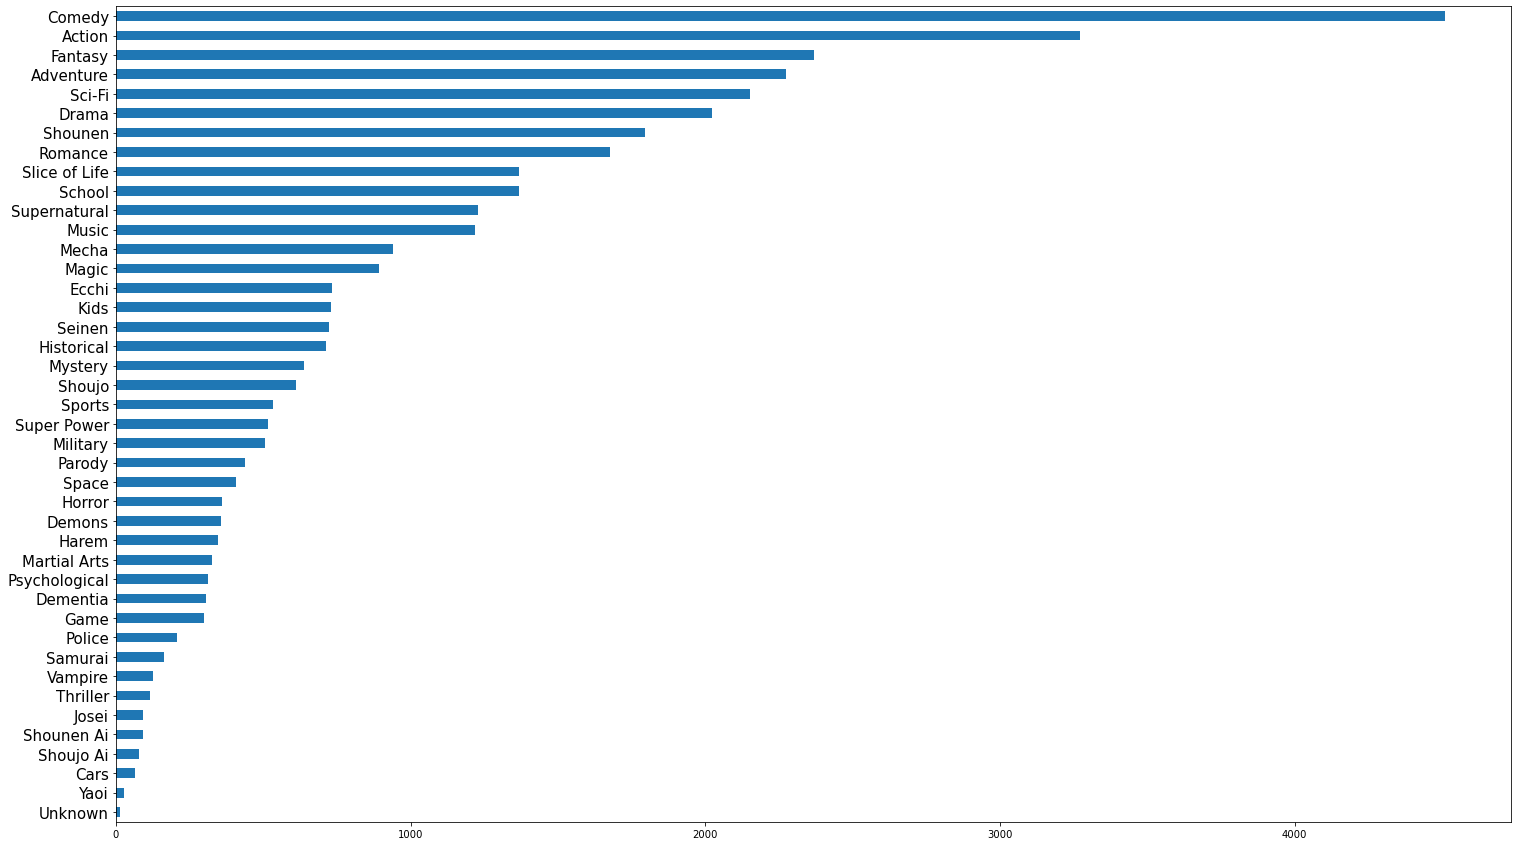

In [24]:
%%time
def remove_whitespace(x):
        return x.strip()

exploded['Genres'] = exploded['Genres'].map(remove_whitespace)

# Plotting top genres
exploded['Genres'].value_counts(ascending = True).plot(kind='barh',figsize = (25,15))
plt.yticks(fontsize=15, rotation=0);

In [25]:
all_genres = defaultdict(int)

for genres in anime['Genres']:
    for genre in genres:
        all_genres[genre.strip()] += 1

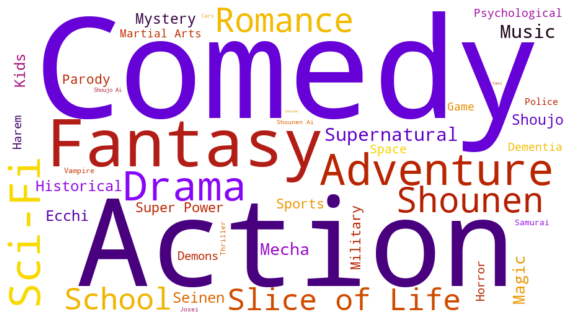

In [26]:
genres_cloud = WordCloud(width=900, height=500, background_color='white', colormap='gnuplot').generate_from_frequencies(all_genres)
plt.figure(figsize = (10,8))
plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Looks like 'Comedy', 'Action', 'Fantasy' and 'Adventure' are pretty popular genres.

### Type

Text(0.5, 1.0, 'ANIME TYPES')

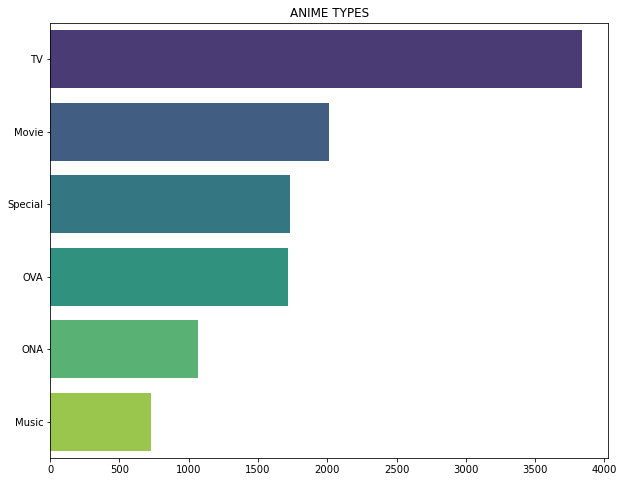

In [27]:
type_count = anime['Type'].value_counts()

plt.figure(figsize = (10,8))

sns.barplot(x = type_count.values,
           y = type_count.index,
           palette = 'viridis')

plt.title('ANIME TYPES')

### Score

In [28]:
by_score = anime[['Name','Score','Type']]
by_score[by_score['Score'] != 'Unknown'].sort_values('Score', ascending = False).head(20)

,Name,Score,Type
3377,Fullmetal Alchemist: Brotherhood,9.19,TV
10551,Shingeki no Kyojin: The Final Season,9.17,TV
4676,Steins;Gate,9.11,TV
5220,Hunter x Hunter (2011),9.1,TV
7289,Gintama°,9.1,TV
10130,Shingeki no Kyojin Season 3 Part 2,9.1,TV
4881,Gintama',9.08,TV
723,Ginga Eiyuu Densetsu,9.07,OVA
5812,Gintama': Enchousen,9.04,TV
9033,3-gatsu no Lion 2nd Season,9.0,TV


In [29]:
# Dropping rows with 'Unknown'
cols = ['Episodes', 'Ranked','Popularity','Members','Favorites']

for i in cols:
    anime = anime[anime[i] != 'Unknown']
    
anime


,MAL_ID,Name,Score,Genres,English name,Type,Episodes,Ranked,Popularity,Members,Favorites,synopsis
0,1,Cowboy Bebop,8.78,"[Action, Adventure, Comedy, Drama, Sci-Fi,...",Cowboy Bebop,TV,26,28.0,39,1251960,61971,"In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"[Action, Drama, Mystery, Sci-Fi, Space]",Cowboy Bebop:The Movie,Movie,1,159.0,518,273145,1174,"other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"[Action, Sci-Fi, Adventure, Comedy, Drama,...",Trigun,TV,26,266.0,201,558913,12944,"Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"[Action, Mystery, Police, Supernatural, Dr...",Witch Hunter Robin,TV,26,2481.0,1467,94683,587,ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"[Adventure, Fantasy, Shounen, Supernatural]",Beet the Vandel Buster,TV,52,3710.0,4369,13224,18,It is the dark century and the people are suff...
...,...,...,...,...,...,...,...,...,...,...,...,...
11085,47398,Kimetsu Gakuen: Valentine-hen,6.59,[Comedy],Unknown,ONA,4,5461.0,3814,18161,72,Valentine's Day special for Kimetsu no Yaiba ....
11086,47402,Heikousen,7.52,"[Music, Romance]",Unknown,Music,1,1517.0,10869,832,27,"usic video for Eve and suis' song Heikousen , ..."
11087,47614,Nu Wushen de Canzhuo Spring Festival Special,6.83,"[Slice of Life, Comedy]",Cooking with Valkyries Spring Festival Special,Special,1,4382.0,11973,540,8,No synopsis information has been added to this...
11088,47616,Yakusoku no Neverland 2nd Season: Michishirube,4.81,"[Mystery, Psychological, Supernatural, Thri...",The Promised Neverland Season 2 Episode 5.5,Special,1,10760.0,4398,13070,90,cap of the first season of Yakusoku no Neverla...


### Synopsis

In [30]:
# Checking for nulls in synopsis
anime['synopsis'].isnull().sum()

0

In [31]:
# Dropping rows with null synopsis
anime.dropna(subset = ['synopsis'], inplace = True)

# Drop rows with no synopsis information as synopsis is one of the features we will be using for content based recommender
no_info = anime[anime['synopsis'].str.match('No synopsis information')].index
anime = anime.drop(no_info)

anime

,MAL_ID,Name,Score,Genres,English name,Type,Episodes,Ranked,Popularity,Members,Favorites,synopsis
0,1,Cowboy Bebop,8.78,"[Action, Adventure, Comedy, Drama, Sci-Fi,...",Cowboy Bebop,TV,26,28.0,39,1251960,61971,"In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"[Action, Drama, Mystery, Sci-Fi, Space]",Cowboy Bebop:The Movie,Movie,1,159.0,518,273145,1174,"other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"[Action, Sci-Fi, Adventure, Comedy, Drama,...",Trigun,TV,26,266.0,201,558913,12944,"Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"[Action, Mystery, Police, Supernatural, Dr...",Witch Hunter Robin,TV,26,2481.0,1467,94683,587,ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"[Adventure, Fantasy, Shounen, Supernatural]",Beet the Vandel Buster,TV,52,3710.0,4369,13224,18,It is the dark century and the people are suff...
...,...,...,...,...,...,...,...,...,...,...,...,...
11084,47307,Shin Gengou Nyankogelion,6.41,"[Sci-Fi, Music, Mecha]",Unknown,Music,1,6360.0,12289,472,20,Promotional music video for the Battle Cats x ...
11085,47398,Kimetsu Gakuen: Valentine-hen,6.59,[Comedy],Unknown,ONA,4,5461.0,3814,18161,72,Valentine's Day special for Kimetsu no Yaiba ....
11086,47402,Heikousen,7.52,"[Music, Romance]",Unknown,Music,1,1517.0,10869,832,27,"usic video for Eve and suis' song Heikousen , ..."
11088,47616,Yakusoku no Neverland 2nd Season: Michishirube,4.81,"[Mystery, Psychological, Supernatural, Thri...",The Promised Neverland Season 2 Episode 5.5,Special,1,10760.0,4398,13070,90,cap of the first season of Yakusoku no Neverla...


In [32]:
# Check duplicates
print(anime['synopsis'].duplicated().sum())

dup_synop = anime[anime['synopsis'].duplicated()].sort_values('synopsis')
dup_synop

167


,MAL_ID,Name,Score,Genres,English name,Type,Episodes,Ranked,Popularity,Members,Favorites,synopsis
7150,28063,Sword Art Online II: Sword Art Offline II,6.55,[Comedy],Unknown,Special,9,5610.0,2291,48525,198,BD/DVD specials.
5950,16508,Ebiten: Kouritsu Ebisugawa Koukou Tenmonbu Spe...,6.07,"[Comedy, Ecchi, Parody, School, Shounen]",Unknown,Special,5,7941.0,7065,4025,0,BD/DVD specials.
9901,37859,Free! Movie 2: Timeless Medley - Yakusoku: Cha...,6.63,[Comedy],Unknown,Movie,4,5247.0,7308,3680,3,Character Stage Greeting Manner Special's show...
9902,37860,Free!: Take Your Marks: Character Butai Aisatsu,6.79,[Comedy],Unknown,Movie,4,4478.0,7103,3983,1,Character Stage Greeting Manner Special's show...
4989,10324,Tono to Issho: Gantai no Yabou,6.47,"[Comedy, Historical, Parody, Samurai, Seinen]",Unknown,TV,12,6042.0,8072,2692,0,Comedy parodying famous samurai generals and h...
...,...,...,...,...,...,...,...,...,...,...,...,...
8444,33220,Natsu no Gero wa Fuyu no Sakana,4.64,"[Dementia, Music]",Summer's Puke is Winter's Delight,Music,1,10858.0,11344,690,0,usic video by Sawako Kabuki.
5813,15423,Antinotice,5.83,[Music],Unknown,Music,1,8729.0,10024,1217,1,usic video from Akane Aki.
5544,13153,Renkyori Enai,6.3,[Music],Unknown,Music,1,6915.0,10391,1034,0,usic video from DECO*27.
9943,37955,Mou Ichido Luminous,6.46,[Music],Unknown,Music,1,6129.0,10309,1073,2,usic video of the project band Pastel＊Palettes.


In [33]:
# Checking if duplicate synopsis has similar titles
print(dup_synop['Name'].duplicated().sum())

# To leave as the duplicates do not seem to share the same titles

0


In [34]:
to_float = ['Score','Ranked']
to_int = ['Episodes','Popularity','Members','Favorites']

anime[to_float] = anime[to_float].astype('float64')
anime[to_int] = anime[to_int].astype('int64')

anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10820 entries, 0 to 11089
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MAL_ID        10820 non-null  int64  
 1   Name          10820 non-null  object 
 2   Score         10820 non-null  float64
 3   Genres        10820 non-null  object 
 4   English name  10820 non-null  object 
 5   Type          10820 non-null  object 
 6   Episodes      10820 non-null  int64  
 7   Ranked        10820 non-null  float64
 8   Popularity    10820 non-null  int64  
 9   Members       10820 non-null  int64  
 10  Favorites     10820 non-null  int64  
 11  synopsis      10820 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 1.1+ MB


Wall time: 218 ms


<AxesSubplot:>

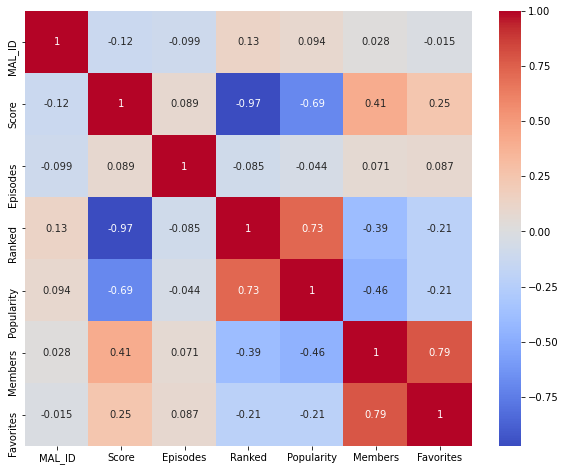

In [35]:
%%time
plt.figure(figsize = (10,8))
sns.heatmap(anime.corr(), annot = True, cmap = 'coolwarm')

Popularity of an anime seems to be positively correlated with number of members in its members group. The higher the average rated score of an anime, the better its ranking (closer to number 1).

In [36]:
# Resetting index for anime dataset
anime = anime.reset_index(drop = True)

### Rating

Wall time: 1.55 s


<AxesSubplot:>

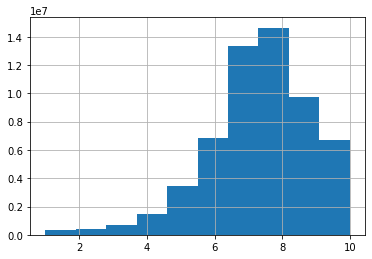

In [37]:
%%time
rating['rating'].hist()

A huge number of ratings seem to given around the 7 to 8 range.

## Content based Recommender 

Content Based recommendation relies on similarity of recommended elements / features. The idea is that if you liked an item, you will also like other items with similar features. The content based recommendation approach solves the cold start problem encountered in the collaborative based problem. For example, if a new item comes into the market, users will not be recommended that item due to it not having being rated. With content based recommendation, the item will have a good score if it ranks highly in terms of similarity to previously used or liked products.

### TFIDF Vectorizer

One feature we will be basing our content based recommender on is the synopsis feature, the idea being that if a user liked an anime with a certain 'style' of synopsis, they will also like other anime titles with a very similar synopsis. To give a score to our synopsis feature, we will be using TFIDF Vectorizer, which takes into account the frequency and weight /'importance' of the word in the document.

The output is a matrix whereby each column represents a word / n-gram and each row represents an observation or in our case, an anime title. This is done to reduce the importance of frequently occurring words in the synopsis and therefore their relevance to the calculation of the final similarity score.

In [38]:
%%time

sypnopsis_str = anime['synopsis'].str.split(',').astype(str)

tfidf = TfidfVectorizer(analyzer = 'word', ngram_range = (1, 2), min_df = 3, stop_words = 'english')
tfidf_matrix = tfidf.fit_transform(sypnopsis_str)

tfidf_matrix.shape

# tfidf.get_feature_names()

Wall time: 1.64 s


(10820, 27220)

In [39]:
tfidf_matrix

<10820x27220 sparse matrix of type '<class 'numpy.float64'>'
	with 431338 stored elements in Compressed Sparse Row format>

In [40]:
tfidf.get_feature_names()

['00',
 '000',
 '000 000',
 '000 years',
 '000 yen',
 '0079',
 '0083',
 '009',
 '009 cyborg',
 '0096',
 '01',
 '02',
 '03',
 '07',
 '08th',
 '08th ms',
 '09',
 '10',
 '10 000',
 '10 11',
 '10 minute',
 '10 minutes',
 '10 new',
 '10 year',
 '10 years',
 '100',
 '100 000',
 '100 scale',
 '100 tv',
 '100 year',
 '100 years',
 '1000',
 '1000 years',
 '1001',
 '1001 nights',
 '100th',
 '100th anniversary',
 '104th',
 '104th training',
 '108',
 '108th',
 '10th',
 '10th anniversary',
 '10th volume',
 '11',
 '11 12',
 '11 episode',
 '11 year',
 '11 years',
 '11th',
 '11th 12th',
 '11th volume',
 '12',
 '12 000',
 '12 13',
 '12 episodes',
 '12 included',
 '12 year',
 '12 years',
 '12th',
 '12th birthday',
 '12th manga',
 '13',
 '13 14',
 '13 2017',
 '13 episode',
 '13 episodes',
 '13 included',
 '13 year',
 '13 years',
 '130',
 '13th',
 '13th episode',
 '14',
 '14 15',
 '14 year',
 '14 years',
 '14th',
 '14th episode',
 '15',
 '15 2013',
 '15 minute',
 '15 minutes',
 '15 second',
 '15 year',
 '

### Cosine Similarity

We will use cosine similarity to calculate a numerical value indicating the similarity between two anime. We use the cosine similarity index because it is magnitude independent and relatively easy and quick to calculate.

Cosine similarity takes the angle between two non-zero vectors and calculates the cosine of that angle, and this value is known as the similarity between the two vectors. This similarity score ranges from 0 to 1, where 0 is the lowest (least similar) and 1 is the highest (most similar). If the angle between two vectors is 0°, then the similarity will be 1. Conversely, if the angle between two vectors is 90°, then the similarity will be 0. For two vectors with an angle greater than 90°, we also consider them to be 0.

In [41]:
%%time
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim[:5, :5]

Wall time: 1.89 s


array([[1.        , 0.23439772, 0.01809157, 0.03294724, 0.00880673],
       [0.23439772, 1.        , 0.04417127, 0.01545808, 0.00453498],
       [0.01809157, 0.04417127, 1.        , 0.        , 0.01568151],
       [0.03294724, 0.01545808, 0.        , 1.        , 0.        ],
       [0.00880673, 0.00453498, 0.01568151, 0.        , 1.        ]])

We now have a pairwise cosine similarity matrix for all the movies in the dataset. The next step is to write a function that returns the 10 most similar movies based on the cosine similarity score.

In [42]:
cosine_sim.shape

(10820, 10820)

##### Synopsis based recommendations

In [43]:
indices = pd.Series(anime.index, index=anime['Name'])
indices

Name
Cowboy Bebop                                          0
Cowboy Bebop: Tengoku no Tobira                       1
Trigun                                                2
Witch Hunter Robin                                    3
Bouken Ou Beet                                        4
                                                  ...  
Shin Gengou Nyankogelion                          10815
Kimetsu Gakuen: Valentine-hen                     10816
Heikousen                                         10817
Yakusoku no Neverland 2nd Season: Michishirube    10818
SK∞: Crazy Rock Jam                               10819
Length: 10820, dtype: int64

In [44]:
def genre_recommendations(title):
    idx = indices[title]  # getting index corresponding with title
    sim_scores = list(enumerate(cosine_sim[idx]))  # get estimates of pairwise similarity of all animes with this anime
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)  # sorting from highest similarity score
    sim_scores = sim_scores[1:11]  # we use 1-11 as 0 will give us the anime that we have chosen
    
    anime_indices = [i[0] for i in sim_scores]  # get indexes
    similarity = [i[1] for i in sim_scores]
    
    return pd.DataFrame({'Anime name': anime['Name'].iloc[anime_indices].values,
                        'Similarity': similarity,
                         'Genre': anime['Genres'].iloc[anime_indices].values,
                        'Type': anime['Type'].iloc[anime_indices].values,
                        'synopsis': anime['synopsis'].iloc[anime_indices].values})  # displaying name, genre, type and synopsis
    

In [45]:
sim_scores = list(enumerate(cosine_sim[indices['Fullmetal Alchemist: Brotherhood']]))
sim_scores

[(0, 0.04424127072900543),
 (1, 0.06020640839721255),
 (2, 0.0023529579690167103),
 (3, 0.003489570436548059),
 (4, 0.010480326452007648),
 (5, 0.010272806878624991),
 (6, 0.009448357041212756),
 (7, 0.0),
 (8, 0.023580414573103295),
 (9, 0.008023433568366713),
 (10, 0.006792033125154527),
 (11, 0.010817988398242127),
 (12, 0.008918038980975703),
 (13, 0.004945536453841512),
 (14, 0.00854041712834934),
 (15, 0.02803235916715556),
 (16, 0.013854260188830514),
 (17, 0.004402714528685551),
 (18, 0.016245725099533318),
 (19, 0.019801429652879968),
 (20, 0.01892089467703322),
 (21, 0.017972541140789666),
 (22, 0.00583162715217468),
 (23, 0.018741967396592847),
 (24, 0.008035283681496773),
 (25, 0.02200616788978273),
 (26, 0.013853453068251868),
 (27, 0.019427862866314503),
 (28, 0.0021711948739544873),
 (29, 0.0),
 (30, 0.005741951110885229),
 (31, 0.003910088852276639),
 (32, 0.0029284702133298016),
 (33, 0.011595109490794956),
 (34, 0.005446571732014421),
 (35, 0.02692034392045038),
 (36,

In [46]:
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores

[(3337, 1.0),
 (99, 0.6204409305984362),
 (4588, 0.42654281362028923),
 (390, 0.3051881409806343),
 (5107, 0.30429479435893747),
 (3772, 0.1967523781526045),
 (9520, 0.09369843918982365),
 (10574, 0.08862609127493494),
 (6403, 0.0868105559248663),
 (7759, 0.0867493697460749),
 (794, 0.08435950426621174),
 (8988, 0.08301533855614733),
 (7363, 0.08080428599349394),
 (9261, 0.07752704090800698),
 (559, 0.07733292974785415),
 (9763, 0.07492393462127228),
 (5854, 0.07467346769900338),
 (5971, 0.07456775728044941),
 (7940, 0.0728064229157652),
 (751, 0.07214110763139221),
 (1614, 0.07120470339025904),
 (2255, 0.06751045899798434),
 (2337, 0.06445782799966823),
 (4549, 0.06426540634325069),
 (5617, 0.06389561096527162),
 (1905, 0.06336655230970979),
 (2188, 0.06326181499737325),
 (5726, 0.06196580164952893),
 (5746, 0.061594553806527515),
 (960, 0.060273426701231474),
 (1, 0.06020640839721255),
 (6247, 0.05959866239152005),
 (4909, 0.05907955233217578),
 (6974, 0.05795983940314487),
 (7457, 0

In [47]:
%%time
genre_recommendations('Fullmetal Alchemist: Brotherhood')

Wall time: 13 ms


,Anime name,Similarity,Genre,Type,synopsis
0,Fullmetal Alchemist,0.620441,"[Action, Adventure, Comedy, Drama, Fantasy...",TV,"Edward Elric, a young, brilliant alchemist, ha..."
1,Fullmetal Alchemist: The Sacred Star of Milos,0.426543,"[Action, Adventure, Comedy, Drama, Fantasy...",Movie,Chasing a runaway alchemist with strange power...
2,Fullmetal Alchemist: The Conqueror of Shamballa,0.305188,"[Military, Comedy, Historical, Drama, Fant...",Movie,"In desperation, Edward Elric sacrificed his bo..."
3,Fullmetal Alchemist: The Sacred Star of Milos ...,0.304295,"[Comedy, Magic, Fantasy]",ONA,To mark the July 2 opening of the Fullmetal Al...
4,Fullmetal Alchemist: Brotherhood Specials,0.196752,"[Military, Adventure, Drama, Magic, Fantas...",Special,mazing secrets and startling facts are exposed...
5,Ta ga Tame no Alchemist,0.093698,"[Action, Adventure, Magic, Fantasy]",Movie,"The game is set in the continent of Babel, whe..."
6,Bungou to Alchemist: Shinpan no Haguruma,0.088626,"[Action, Adventure, Fantasy]",TV,Famous writers throughout history find themsel...
7,Escha & Logy no Atelier: Tasogare no Sora no R...,0.086811,[Fantasy],TV,"This world has gone through many Dusks, and is..."
8,Joker Game,0.086749,"[Military, Historical, Drama]",TV,"h World War II right around the corner, intell..."
9,Fullmetal Alchemist: Premium Collection,0.084360,"[Fantasy, Comedy, Shounen]",OVA,1. State Alchemists vs Seven Homunculi A 10 mi...


In [48]:
%%time
genre_recommendations('Death Note')

Wall time: 12 ms


,Anime name,Similarity,Genre,Type,synopsis
0,Death Note: Rewrite,0.205978,"[Mystery, Police, Psychological, Supernatur...",Special,1. Genshisuru Kami (Visions of a God) A two ho...
1,YAT Anshin! Uchuu Ryokou 2,0.177198,"[Adventure, Comedy, Sci-Fi, Shounen]",TV,"The space travelling company, YAT, is thrown i..."
2,Soul Eater,0.174998,"[Action, Fantasy, Comedy, Supernatural, Sh...",TV,Death City is home to the famous Death Weapon ...
3,Yami no Matsuei,0.167690,"[Comedy, Drama, Fantasy, Horror, Magic, S...",TV,"Even after death, life is full of paperwork an..."
4,Kite Liberator,0.149751,"[Action, Sci-Fi, Drama]",OVA,"In the previous series ""Kite,"" a killer—Sawa—s..."
5,Medarot Damashii,0.138183,"[Action, Sci-Fi, Adventure]",TV,"The sequel to the famous Medabots series, foll..."
6,Yami no Shihosha Judge,0.134289,"[Supernatural, Horror, Seinen]",OVA,Hoichiro Ohma works in an office. Everybody kn...
7,Shinigami no Ballad.,0.132584,"[Drama, Fantasy, Psychological, Supernatural]",TV,"girl wrapped in white, her name is Momo...in h..."
8,Dia Horizon (Kabu),0.132326,"[Action, Adventure, Magic, Fantasy]",TV,met and shared one death in two lives. What's ...
9,Bleach: Memories in the Rain,0.127489,"[Action, Adventure, Supernatural, Drama, S...",Special,"Kurosaki Ichigo, the temporary Shinigami(Death..."


In [49]:
genre_recommendations('Clannad')

,Anime name,Similarity,Genre,Type,synopsis
0,Clannad Movie,0.583302,"[Drama, Romance, Fantasy, School]",Movie,Tomoya Okazaki is a cynical delinquent who lac...
1,"Clannad: After Story - Mou Hitotsu no Sekai, K...",0.331426,"[Drama, Romance, School]",Special,Included in the 8th and final DVD of Clannad ~...
2,Memories Off,0.303988,"[Romance, Drama]",OVA,Tomoya Mikami's life changed one day when his ...
3,"Clannad: Mou Hitotsu no Sekai, Tomoyo-hen",0.298092,"[Drama, Romance, School, Slice of Life]",Special,"Clannad: Mou Hitotsu no Sekai, Tomoyo-hen is s..."
4,Saenai Heroine no Sodatekata,0.278150,"[Harem, Comedy, Romance, Ecchi, School]",TV,"Tomoya Aki, an otaku, has been obsessed with c..."
5,Clannad: After Story,0.277784,"[Slice of Life, Comedy, Supernatural, Drama...",TV,"Clannad: After Story , the sequel to the criti..."
6,Saenai Heroine no Sodatekata: Ai to Seishun no...,0.241989,"[Harem, Comedy, Romance, Ecchi]",Special,"Tomoya Aki, Megumi Katou, Eriri Spencer Sawamu..."
7,Saenai Heroine no Sodatekata Fine,0.236612,"[Harem, Comedy, Romance, Ecchi, School]",Movie,h the second Winter Comiket just around the co...
8,Strawberry Panic,0.208073,"[Drama, Romance, School, Shoujo Ai]",TV,Nagisa Aoi begins her new school life as a tra...
9,Oneechan ga Kita,0.201962,"[Comedy, Slice of Life]",TV,"The story revolves around Tomoya Mizuhara, a 1..."


##### Genre recommendations with synopsis

Combining genres matrix with synopsis matrix

In [50]:
genres_str1 = anime['Genres'].astype(str)
# sypnopsis_str1 = anime_df['sypnopsis'].str.split(',').astype(str)
# unit =  pd.concat([sypnopsis_str1, genres_str1])

tfidf1 = TfidfVectorizer(analyzer = 'word', ngram_range = (1, 1), min_df = 1)
tfidf_matrix1 = tfidf1.fit_transform(genres_str1)

tfidf_matrix1.shape

# # tfidf.get_feature_names()

(10820, 45)

In [51]:
tfidf1.get_feature_names()

['action',
 'adventure',
 'ai',
 'arts',
 'cars',
 'comedy',
 'dementia',
 'demons',
 'drama',
 'ecchi',
 'fantasy',
 'fi',
 'game',
 'harem',
 'historical',
 'horror',
 'josei',
 'kids',
 'life',
 'magic',
 'martial',
 'mecha',
 'military',
 'music',
 'mystery',
 'of',
 'parody',
 'police',
 'power',
 'psychological',
 'romance',
 'samurai',
 'school',
 'sci',
 'seinen',
 'shoujo',
 'shounen',
 'slice',
 'space',
 'sports',
 'super',
 'supernatural',
 'thriller',
 'unknown',
 'vampire']

In [52]:
genres_str1

0        ['Action', ' Adventure', ' Comedy', ' Drama', ...
1        ['Action', ' Drama', ' Mystery', ' Sci-Fi', ' ...
2        ['Action', ' Sci-Fi', ' Adventure', ' Comedy',...
3        ['Action', ' Mystery', ' Police', ' Supernatur...
4        ['Adventure', ' Fantasy', ' Shounen', ' Supern...
                               ...                        
10815                       ['Sci-Fi', ' Music', ' Mecha']
10816                                           ['Comedy']
10817                                ['Music', ' Romance']
10818    ['Mystery', ' Psychological', ' Supernatural',...
10819                                ['Comedy', ' Sports']
Name: Genres, Length: 10820, dtype: object

In [53]:
# Combining both dataframes
synop_df = pd.DataFrame(tfidf_matrix.toarray())
genre_df = pd.DataFrame(tfidf_matrix1.toarray())
comb = pd.concat([synop_df, genre_df], axis = 1)
comb = csr_matrix(comb)
print(comb.shape)

(10820, 27265)


In [54]:
cosine_sim1 = cosine_similarity(comb, comb)
cosine_sim1[:5, :5]

array([[1.        , 0.50765767, 0.37913549, 0.11207507, 0.08531694],
       [0.50765767, 1.        , 0.27720009, 0.21111239, 0.00226749],
       [0.37913549, 0.27720009, 1.        , 0.10666712, 0.20195824],
       [0.11207507, 0.21111239, 0.10666712, 1.        , 0.10581241],
       [0.08531694, 0.00226749, 0.20195824, 0.10581241, 1.        ]])

In [55]:
comb

<10820x27265 sparse matrix of type '<class 'numpy.float64'>'
	with 473232 stored elements in Compressed Sparse Row format>

In [56]:
def synop_genre_recommendations(title):
    idx = indices[title]  # getting index corresponding with title
    sim_scores = list(enumerate(cosine_sim1[idx]))  # get estimates of pairwise similarity of all animes with this anime
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)  # sorting from highest similarity score
    sim_scores = sim_scores[1:11]  # we use 1-11 as 0 will give us the anime that we have chosen
    
    anime_indices = [i[0] for i in sim_scores]  # get indexes
    similarity = [i[1] for i in sim_scores]
    
    return pd.DataFrame({'Anime name': anime['Name'].iloc[anime_indices].values,
                        'Similarity': similarity,
                         'Genre': anime['Genres'].iloc[anime_indices].values,
                        'Type': anime['Type'].iloc[anime_indices].values,
                        'synopsis': anime['synopsis'].iloc[anime_indices].values})  # displaying name, genre, type and synopsis

In [57]:
anime[anime['Name'].str.match('Shingeki')]

,MAL_ID,Name,Score,Genres,English name,Type,Episodes,Ranked,Popularity,Members,Favorites,synopsis
5882,16498,Shingeki no Kyojin,8.48,"[Action, Military, Mystery, Super Power, D...",Attack on Titan,TV,25,115.0,2,2531397,129844,"Centuries ago, mankind was slaughtered to near..."
6113,18397,Shingeki no Kyojin OVA,7.83,"[Action, Super Power, Drama, Fantasy, Shou...",Unknown,OVA,3,769.0,469,300057,1116,Ilse no Techou: Aru Chousa Heidanin no Shuki D...
6217,19285,Shingeki no Kyojin: Ano Hi Kara,7.14,"[Action, Drama, Fantasy, Shounen, Super Po...",Attack on Titan:Since That Day,Special,1,3016.0,1408,99123,351,cap of the events in Shingeki no Kyojin that h...
6230,19391,Shingeki no Kyojin Picture Drama,6.63,"[Parody, Comedy]",Unknown,Special,9,5228.0,2421,43842,88,Shingeki no Kyojin Picture Drama is a series o...
6496,21843,Shingeki no Bahamut: Genesis,7.67,"[Action, Adventure, Demons, Supernatural, ...",Rage of Bahamut:Genesis,TV,12,1107.0,416,330227,1556,"Thousands of years ago, the ancient dragon Bah..."
6730,23775,Shingeki no Kyojin Movie 1: Guren no Yumiya,7.64,"[Action, Drama, Fantasy, Shounen, Super Po...",Attack on Titan:Crimson Bow and Arrow,Movie,1,1180.0,1674,79380,174,cap of episodes 1-13.
6731,23777,Shingeki no Kyojin Movie 2: Jiyuu no Tsubasa,7.74,"[Action, Super Power, Drama, Fantasy, Shou...",Attack on Titan:Wings of Freedom,Movie,1,943.0,1679,79018,205,cap of episodes 14-25.
6929,25777,Shingeki no Kyojin Season 2,8.45,"[Action, Military, Mystery, Super Power, D...",Attack on Titan Season 2,TV,12,128.0,16,1591506,18262,"For centuries, humanity has been hunted by gia..."
6930,25781,Shingeki no Kyojin: Kuinaki Sentaku,8.38,"[Action, Fantasy, Shoujo]",Unknown,OVA,2,170.0,430,323012,1842,any years before becoming the famed captain of...
7110,28447,Shingeki no Bahamut: Genesis - Roundup,6.33,"[Action, Adventure, Demons, Supernatural, ...",Unknown,Special,1,6727.0,4354,13467,7,cap of the first six episodes of Shingeki no B...


In [58]:
%%time
synop_genre_recommendations('Nodame Cantabile')

Wall time: 47.4 ms


,Anime name,Similarity,Genre,Type,synopsis
0,Nodame Cantabile: Paris-hen,0.638839,"[Comedy, Josei, Music, Romance, Slice of L...",TV,"Shinichi Chiaki conquers his fear of flying, a..."
1,Nodame Cantabile: Nodame to Chiaki no Umi Mono...,0.598295,"[Comedy, Josei, Romance, Slice of Life]",Special,orld-class conductor Franz von Stresemann send...
2,Nodame Cantabile: Finale,0.546628,"[Comedy, Josei, Music, Romance]",TV,Shinichi Chiaki is quickly making a name for h...
3,Nodame Cantabile OVA,0.535370,"[Comedy, Josei, Music, Romance, Slice of L...",OVA,"Yukihisa Matsuda, principal conductor of the R..."
4,Nodame Cantabile: Finale - Mine to Kiyora no S...,0.518830,"[Comedy, Josei, Music, Romance]",Special,Violinist Kiyora Miki meets with Shinichi Chia...
5,Hachimitsu to Clover,0.477595,"[Comedy, Drama, Josei, Romance, Slice of L...",TV,"Yuuta Takemoto, a sophomore at an arts college..."
6,Paradise Kiss,0.473946,"[Comedy, Drama, Josei, Romance, Slice of L...",TV,"On her way home from school, Yukari Hayasaka i..."
7,Hachimitsu to Clover II,0.471681,"[Drama, Josei, Romance, Slice of Life]",TV,"Back from his journey across Japan, Yuuta Take..."
8,Hachimitsu to Clover Specials,0.470998,"[Comedy, Drama, Josei, Romance, Slice of L...",Special,Two side stories: Chapter L (or chapter 25) ab...
9,Otona Joshi no Anime Time,0.468867,"[Slice of Life, Drama, Romance, Josei]",Special,series of animations based on prize-winning sh...


In [59]:
genre_recommendations('Nodame Cantabile')

,Anime name,Similarity,Genre,Type,synopsis
0,Nodame Cantabile: Paris-hen,0.318180,"[Comedy, Josei, Music, Romance, Slice of L...",TV,"Shinichi Chiaki conquers his fear of flying, a..."
1,Detective Conan Magic File 3: Shinichi and Ran...,0.315830,"[Mystery, Shounen]",OVA,other Shinichi and Ran pre-story.
2,Nodame Cantabile: Finale,0.313750,"[Comedy, Josei, Music, Romance]",TV,Shinichi Chiaki is quickly making a name for h...
3,Nodame Cantabile: Nodame to Chiaki no Umi Mono...,0.297705,"[Comedy, Josei, Romance, Slice of Life]",Special,orld-class conductor Franz von Stresemann send...
4,Nodame Cantabile: Finale - Mine to Kiyora no S...,0.258153,"[Comedy, Josei, Music, Romance]",Special,Violinist Kiyora Miki meets with Shinichi Chia...
5,Detective Conan Movie 01: The Timed Skyscraper,0.224525,"[Adventure, Mystery, Comedy, Police, Shounen]",Movie,Conan Edogawa is facing a dilemma: Ran Mouri h...
6,Channel 5.5 3rd Season,0.195823,"[Parody, Comedy]",ONA,Following their run of comedy shorts with Sumi...
7,Detective Conan Movie 13: The Raven Chaser,0.191035,"[Action, Police, Mystery, Shounen]",Movie,Kudou Shinichi is living his life as Edogawa C...
8,Nodame Cantabile: Finale OVA,0.189411,"[Comedy, Romance, Josei]",OVA,anime-original story written by Ninomiya Tomok...
9,Majuu Sensen: The Apocalypse,0.186568,"[Action, Super Power, Demons, Supernatural,...",TV,city is destroyed by two monstrous and omnipot...


In [60]:
%%time
synop_genre_recommendations('Shingeki no Kyojin')

Wall time: 15 ms


,Anime name,Similarity,Genre,Type,synopsis
0,Shingeki no Kyojin Season 2,0.654938,"[Action, Military, Mystery, Super Power, D...",TV,"For centuries, humanity has been hunted by gia..."
1,Shingeki no Kyojin Season 3,0.654660,"[Action, Military, Mystery, Super Power, D...",TV,"Still threatened by the ""Titans"" that rob them..."
2,Shingeki no Kyojin Season 3 Part 2,0.653811,"[Action, Drama, Fantasy, Military, Mystery...",TV,Seeking to restore humanity's diminishing hope...
3,Shingeki no Kyojin: The Final Season,0.622268,"[Action, Military, Mystery, Super Power, D...",TV,Gabi Braun and Falco Grice have been training ...
4,Shingeki no Kyojin Season 2 Movie: Kakusei no ...,0.521370,"[Action, Drama, Fantasy, Shounen, Super Po...",Movie,Eren Yeager and others of the 104th Training C...
5,Shingeki no Kyojin: Chronicle,0.500000,"[Action, Military, Mystery, Super Power, D...",Movie,The compilation film will recap the anime's 59...
6,Shingeki no Kyojin OVA,0.466741,"[Action, Super Power, Drama, Fantasy, Shou...",OVA,Ilse no Techou: Aru Chousa Heidanin no Shuki D...
7,Shingeki no Kyojin-ten 360° Taikan Theater,0.457533,"[Action, Fantasy, Shounen, Super Power]",Special,Virtual reality movies included with the Blu-r...
8,Shingeki no Kyojin: Ano Hi Kara,0.453284,"[Action, Drama, Fantasy, Shounen, Super Po...",Special,cap of the events in Shingeki no Kyojin that h...
9,Shingeki no Kyojin Movie 1: Guren no Yumiya,0.404398,"[Action, Drama, Fantasy, Shounen, Super Po...",Movie,cap of episodes 1-13.


In [61]:
genre_recommendations('Shingeki no Kyojin')

,Anime name,Similarity,Genre,Type,synopsis
0,Shingeki no Kyojin Season 2,0.309876,"[Action, Military, Mystery, Super Power, D...",TV,"For centuries, humanity has been hunted by gia..."
1,Shingeki no Kyojin Season 3,0.309319,"[Action, Military, Mystery, Super Power, D...",TV,"Still threatened by the ""Titans"" that rob them..."
2,Shingeki no Kyojin Season 3 Part 2,0.307622,"[Action, Drama, Fantasy, Military, Mystery...",TV,Seeking to restore humanity's diminishing hope...
3,Shingeki! Kyojin Chuugakkou,0.272467,"[Comedy, Parody, School, Shounen]",TV,"On his first day of junior high, Eren Yeager c..."
4,Shingeki no Kyotou,0.249875,"[Action, Fantasy, Shounen]",Special,special anime featuring a battle against the C...
5,Shingeki no Kyojin: The Final Season,0.244536,"[Action, Military, Mystery, Super Power, D...",TV,Gabi Braun and Falco Grice have been training ...
6,Shingeki no Kyojin Season 2 Movie: Kakusei no ...,0.233944,"[Action, Drama, Fantasy, Shounen, Super Po...",Movie,Eren Yeager and others of the 104th Training C...
7,Shingeki no Kyojin-ten 360° Taikan Theater,0.157461,"[Action, Fantasy, Shounen, Super Power]",Special,Virtual reality movies included with the Blu-r...
8,Shingeki no Kyojin: Lost Girls,0.145104,"[Action, Horror, Supernatural, Drama, Fant...",OVA,"all Sina, Goodbye Annie Leonhart has a job to ..."
9,Shingeki no Kyojin: Kuinaki Sentaku,0.127618,"[Action, Fantasy, Shoujo]",OVA,any years before becoming the famed captain of...


Content based recommender using synopsis and genre seems to have better similarity score than using only synopsis.

## Collaborative based Filtering

- Clustering using KNN
- Surprise Recommender library with SVD and NMF

### Clustering using KNN

Recommendation System

Building recommendation system to scale using scikit-surprise (surprise library)

[Recommender systems](https://en.wikipedia.org/wiki/Recommender_system) are one of the most common used and easily understandable applications of data science. Lots of work has been done on this topic, the interest and demand in this area remains very high because of the rapid growth of the internet and the information overload problem. It has become necessary for online businesses to help users to deal with information overload and provide personalized recommendations, content and services to them.

Two of the most popular ways to approach recommender systems are [collaborative filtering](https://en.wikipedia.org/wiki/Collaborative_filtering) and [content-based recommendations](https://www.analyticsvidhya.com/blog/2015/08/beginners-guide-learn-content-based-recommender-systems/). In this post, we will focus on the **collaborative filtering** approach, that is: the user is recommended items that people with similar tastes and preferences liked in the past. In another word, this method predicts unknown ratings by using the similarities between users.

In [62]:
rating.groupby('user_id').count()

,anime_id,rating
user_id,,
0,35,35
1,103,103
2,51,51
3,315,315
4,118,118
...,...,...
353400,67,67
353401,62,62
353402,19,19


In [ ]:
anime1[anime1['Name'] == 'Cowboy Bebop']

In [65]:
%%time
# Taking animes that have been rated more than 1000 times and users who have given more than 500 ratings
count = rating['user_id'].value_counts()
count1 = rating['anime_id'].value_counts()
rating = rating[rating['user_id'].isin(count[count >= 500].index)]
rating = rating[rating['anime_id'].isin(count1[count1 >= 1000].index)]

Wall time: 2.69 s


In [66]:
%%time
# Merging anime[''MAL_ID, anime_id'] dataset with rating dataset
anime = anime.rename(columns = {'MAL_ID':'anime_id'})

anime1 = anime.merge(rating, on = 'anime_id')

anime1

,anime_id,Name,Score,Genres,English name,Type,Episodes,Ranked,Popularity,Members,Favorites,synopsis,user_id,rating
0,1,Cowboy Bebop,8.78,"[Action, Adventure, Comedy, Drama, Sci-Fi,...",Cowboy Bebop,TV,26,28.0,39,1251960,61971,"In the year 2071, humanity has colonized sever...",19,8
1,1,Cowboy Bebop,8.78,"[Action, Adventure, Comedy, Drama, Sci-Fi,...",Cowboy Bebop,TV,26,28.0,39,1251960,61971,"In the year 2071, humanity has colonized sever...",112,10
2,1,Cowboy Bebop,8.78,"[Action, Adventure, Comedy, Drama, Sci-Fi,...",Cowboy Bebop,TV,26,28.0,39,1251960,61971,"In the year 2071, humanity has colonized sever...",156,9
3,1,Cowboy Bebop,8.78,"[Action, Adventure, Comedy, Drama, Sci-Fi,...",Cowboy Bebop,TV,26,28.0,39,1251960,61971,"In the year 2071, humanity has colonized sever...",172,9
4,1,Cowboy Bebop,8.78,"[Action, Adventure, Comedy, Drama, Sci-Fi,...",Cowboy Bebop,TV,26,28.0,39,1251960,61971,"In the year 2071, humanity has colonized sever...",222,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16476292,42984,Gotcha!,8.44,"[Music, Fantasy]",Unknown,Music,1,131.0,4280,14082,155,"Pokémon-themed music video for the song ""Acaci...",352156,7
16476293,42984,Gotcha!,8.44,"[Music, Fantasy]",Unknown,Music,1,131.0,4280,14082,155,"Pokémon-themed music video for the song ""Acaci...",352501,6
16476294,42984,Gotcha!,8.44,"[Music, Fantasy]",Unknown,Music,1,131.0,4280,14082,155,"Pokémon-themed music video for the song ""Acaci...",352887,10
16476295,42984,Gotcha!,8.44,"[Music, Fantasy]",Unknown,Music,1,131.0,4280,14082,155,"Pokémon-themed music video for the song ""Acaci...",352960,8


In [67]:
anime1['user_id'].value_counts()

189037    3841
68042     3787
283786    3782
277841    3772
291207    3720
          ... 
336004       4
305794       2
232922       2
250009       2
224597       1
Name: user_id, Length: 23002, dtype: int64

In [ ]:
rating

In [ ]:
rating.groupby('user_id').count()

In [ ]:
rating.groupby('anime_id').count()

In [ ]:
rating.isnull().sum()

In [ ]:
anime